# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [12]:
n = 5
label_name = "stat6"
epochs = 1000
train_split, test_split = 0.6, 0.4
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [13]:

layers = [5,2]
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [14]:
import os

directory = "models"
if not os.path.exists(directory):
    os.makedirs(directory)


for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")


Epoch 0, Loss 1.5577073693275452
Epoch 1, Loss 1.5373061895370483
Epoch 2, Loss 1.5525617599487305
Epoch 3, Loss 1.6001743078231812
Epoch 4, Loss 1.426479458808899
Epoch 5, Loss 1.5216617584228516
Epoch 6, Loss 1.6252590417861938
Epoch 7, Loss 1.5688356161117554
Epoch 8, Loss 1.599018156528473
Epoch 9, Loss 1.552394688129425
Epoch 10, Loss 1.5473764538764954
Epoch 11, Loss 1.3509183526039124
Epoch 12, Loss 1.481411099433899
Epoch 13, Loss 1.4856911897659302
Epoch 14, Loss 1.400628924369812
Epoch 15, Loss 1.5444700717926025
Epoch 16, Loss 1.463098168373108
Epoch 17, Loss 1.5200677514076233
Epoch 18, Loss 1.4903313517570496
Epoch 19, Loss 1.4043583273887634
Epoch 20, Loss 1.4563894271850586
Epoch 21, Loss 1.4391015768051147
Epoch 22, Loss 1.4204471707344055
Epoch 23, Loss 1.5069500207901
Epoch 24, Loss 1.4391059279441833
Epoch 25, Loss 1.4927313327789307
Epoch 26, Loss 1.436510980129242
Epoch 27, Loss 1.504543125629425
Epoch 28, Loss 1.3758075833320618
Epoch 29, Loss 1.3759987354278564
E

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

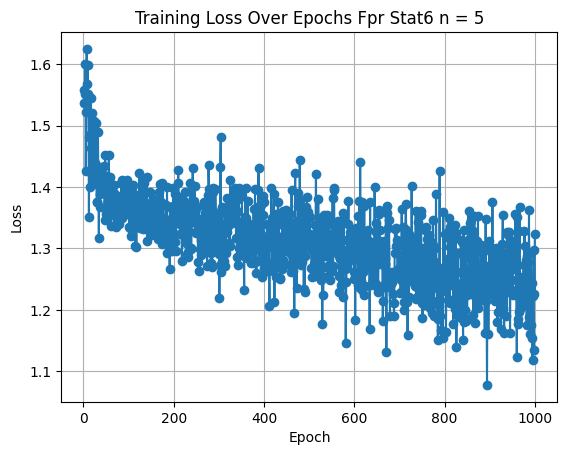

In [15]:
# Plot the training losses
plt.figure()
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title('Training Loss Over Epochs Fpr Stat6 n = 5')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Ensure the "figures" directory exists
figures_directory = "figures"
if not os.path.exists(figures_directory):
    os.makedirs(figures_directory)

# Save the plot
plt.savefig(os.path.join(figures_directory, 'training_loss_curve_stat6 n = 5.png'))
plt.show()
plt.close()  # Explicitly close the plot to ensure it is written to the file





# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

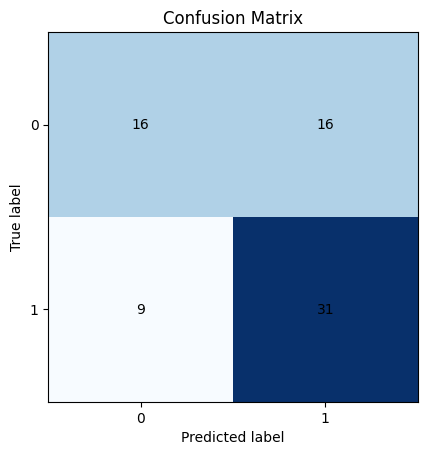

Accuracy for class 0 = 50.0%
Accuracy for class 1 = 77.5%
Overall accuracy = 65.27777777777777%


In [16]:
# TOD0
confusion_matrix = evaluate_model(model, training_dataset)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

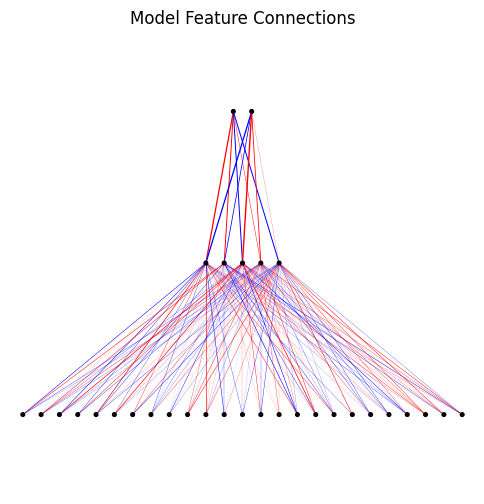

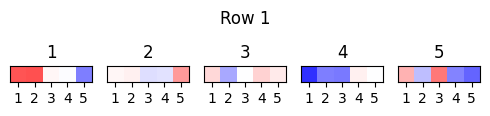

In [17]:



model.plot_connections()


model.plot_heatmap_feature(0, 1)


